In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('..\\resource\\data.csv', parse_dates=['date'], skipinitialspace=True)
data

,date,pm25,pm10,o3,no2,so2,co
0,2024-04-01,99.0,56.0,32.0,2.0,NaN,NaN
1,2024-04-02,95.0,51.0,30.0,3.0,NaN,NaN
2,2024-04-03,94.0,53.0,30.0,3.0,NaN,NaN
3,2024-04-04,88.0,54.0,30.0,3.0,NaN,NaN
4,2024-04-05,94.0,56.0,31.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...
3745,2015-03-15,NaN,NaN,23.0,13.0,3.0,9.0
3746,2014-11-30,NaN,NaN,40.0,36.0,4.0,11.0
3747,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
3748,2014-01-26,NaN,NaN,54.0,53.0,6.0,18.0


In [19]:
data = data.sort_index()
data

,date,pm25,pm10,o3,no2,so2,co
0,2024-04-01,99.0,56.0,32.0,2.0,NaN,NaN
1,2024-04-02,95.0,51.0,30.0,3.0,NaN,NaN
2,2024-04-03,94.0,53.0,30.0,3.0,NaN,NaN
3,2024-04-04,88.0,54.0,30.0,3.0,NaN,NaN
4,2024-04-05,94.0,56.0,31.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...
3745,2015-03-15,NaN,NaN,23.0,13.0,3.0,9.0
3746,2014-11-30,NaN,NaN,40.0,36.0,4.0,11.0
3747,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
3748,2014-01-26,NaN,NaN,54.0,53.0,6.0,18.0


In [20]:
y_col = 'pm25'

data.dropna(subset=[y_col], inplace=True)
data

,date,pm25,pm10,o3,no2,so2,co
0,2024-04-01,99.0,56.0,32.0,2.0,NaN,NaN
1,2024-04-02,95.0,51.0,30.0,3.0,NaN,NaN
2,2024-04-03,94.0,53.0,30.0,3.0,NaN,NaN
3,2024-04-04,88.0,54.0,30.0,3.0,NaN,NaN
4,2024-04-05,94.0,56.0,31.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...
2801,2016-09-26,52.0,29.0,18.0,11.0,1.0,NaN
2802,2016-09-27,46.0,21.0,10.0,11.0,1.0,NaN
2803,2016-09-28,54.0,22.0,18.0,9.0,1.0,NaN
2804,2016-09-29,51.0,22.0,16.0,9.0,1.0,NaN


In [21]:
df = data[['date', y_col]]
df.columns = ['ds', 'y']
df

,ds,y
0,2024-04-01,99.0
1,2024-04-02,95.0
2,2024-04-03,94.0
3,2024-04-04,88.0
4,2024-04-05,94.0
...,...,...
2801,2016-09-26,52.0
2802,2016-09-27,46.0
2803,2016-09-28,54.0
2804,2016-09-29,51.0


In [22]:
from prophet import Prophet

<Axes: xlabel='date'>

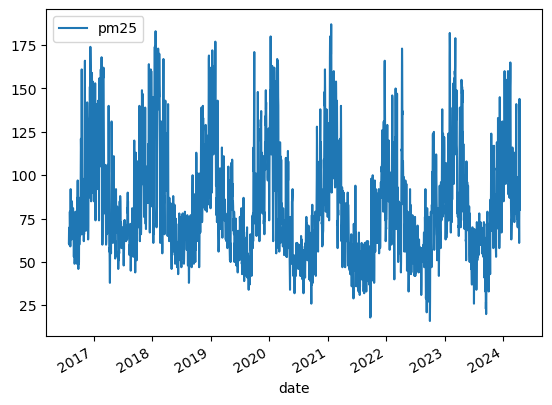

In [23]:
data.plot(x='date', y=y_col)

In [27]:
model = Prophet()
model.fit(df)

01:41:13 - cmdstanpy - INFO - Chain [1] start processing
01:41:13 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
3166,2025-04-09
3167,2025-04-10
3168,2025-04-11
3169,2025-04-12
3170,2025-04-13


In [32]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3166,2025-04-09,95.246633,67.272235,121.846077
3167,2025-04-10,93.868136,65.264971,120.546651
3168,2025-04-11,92.547943,65.813001,121.878041
3169,2025-04-12,92.329682,63.168538,118.124898
3170,2025-04-13,90.034779,61.903893,118.755555


c:\Users\onopi\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\onopi\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


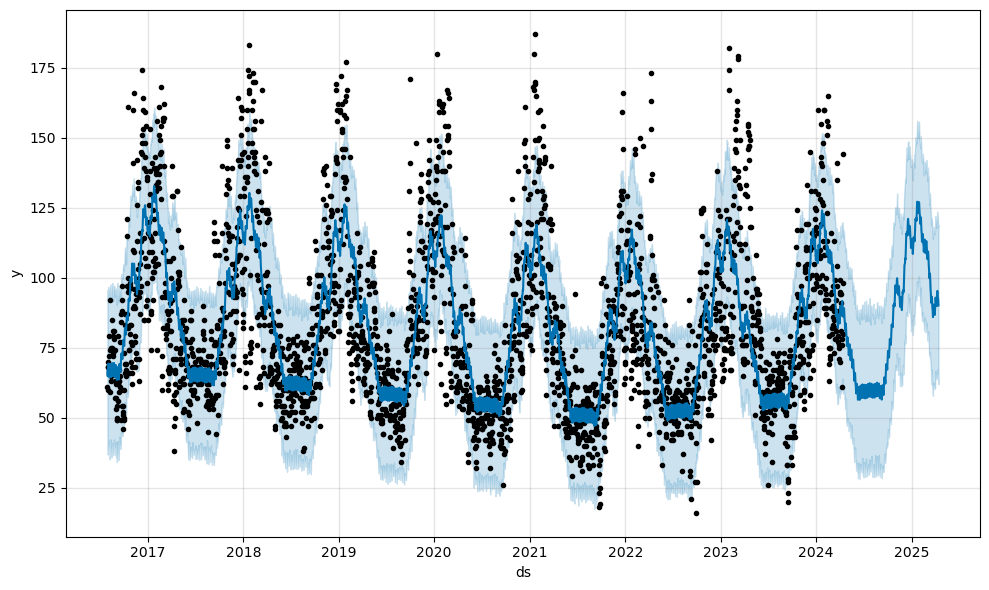

In [33]:
fig1 = model.plot(forecast)

c:\Users\onopi\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\onopi\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\onopi\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

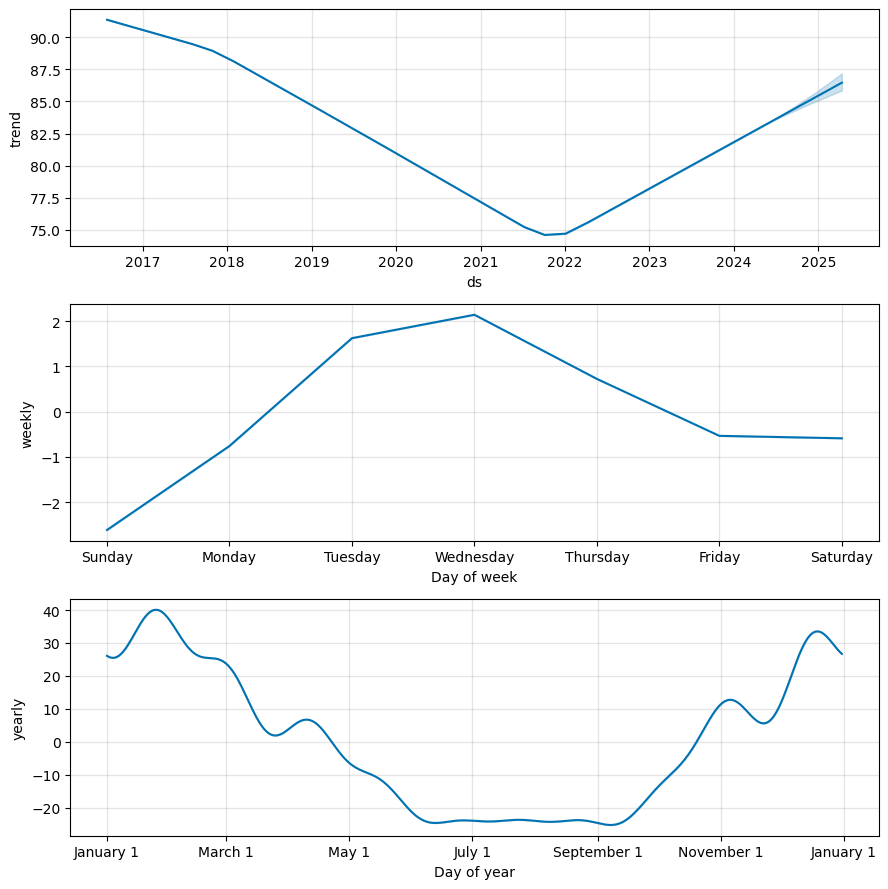

In [34]:
fig2 = model.plot_components(forecast)

In [35]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

c:\Users\onopi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [37]:
plot_components_plotly(model, forecast)

c:\Users\onopi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\onopi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\onopi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\onopi\anaconda3\Lib\si